In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import subprocess
import os
from pathlib import Path


from dask.distributed import Client
client = Client()
client

/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 33699 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/33699/status,
Dashboard: /proxy/33699/status,Workers: 4
Total threads: 8,Total memory: 32.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:35423,Workers: 4
Dashboard: /proxy/33699/status,Total threads: 8
Started: Just now,Total memory: 32.00 GiB
Comm: tcp://127.0.0.1:41339,Total threads: 2
Dashboard: /proxy/35527/status,Memory: 8.00 GiB
Nanny: tcp://127.0.0.1:40101,


0.3.0


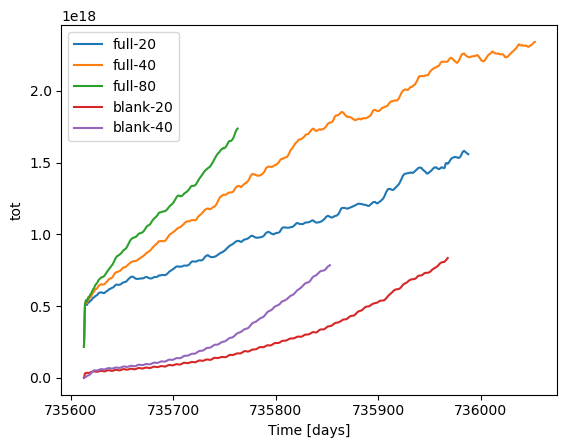

In [2]:
stats = {}
expts = ["full-20","full-40","full-80","blank-20","blank-40"]
for i in expts:
    try:
        temp = xr.open_mfdataset(
            [str(j) for j in (Path("/g/data/nm03/ab8992/outputs") / i).glob("output*/ocean_stats.nc")],decode_times = False
        )

        stats[i]  = xr.Dataset(
            {
                "KE": temp.KE.sum("Layer"),
                "PE": temp.APE.sum("Interface"),
                "tot": temp.KE.sum("Layer") + temp.APE.sum("Interface")
            }
        )
        # Modify Time coordinate of stats[i]


        # stats[i].coords["Time"][:].values -= 735600
    except Exception as e:
        print(i)
        print(e)
        pass
for i in expts:
    stats[i].tot.plot(label=i)
    plt.legend()

0.3.0


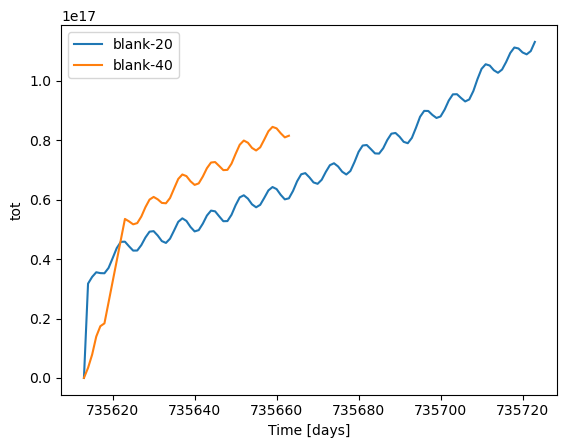

In [2]:
stats = {}
expts = ["blank-20","blank-40"]
for i in expts:
    try:
        temp = xr.open_mfdataset(
            [str(j) for j in (Path("/g/data/nm03/ab8992/outputs") / i).glob("output*/ocean_stats.nc")],decode_times = False
        )

        stats[i]  = xr.Dataset(
            {
                "KE": temp.KE.sum("Layer"),
                "PE": temp.APE.sum("Interface"),
                "tot": temp.KE.sum("Layer") + temp.APE.sum("Interface")
            }
        )
        # Modify Time coordinate of stats[i]


        # stats[i].coords["Time"][:].values -= 735600
    except Exception as e:
        print(i)
        print(e)
        pass
for i in expts:
    stats[i].tot.plot(label=i)

plt.legend()

## Spinup in our region only


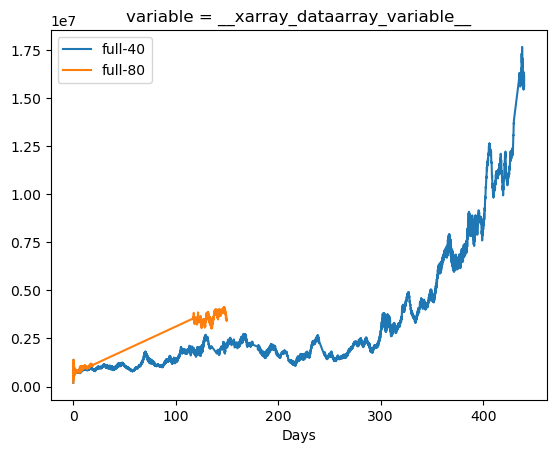

In [12]:
expts = ["full-40","full-80"]
# expts = ["blank-40"]


for i in expts:
    ke = xr.open_mfdataset(
        f"/g/data/nm03/ab8992/postprocessed/{i}/ke_timeseries.nc",decode_times = False,parallel=True
    ).to_dataarray()
    ke = ke.assign_coords({"time":ke.time/24})
    ke.plot(label = i)
plt.xlabel("Days")
plt.legend()



## M2 energy

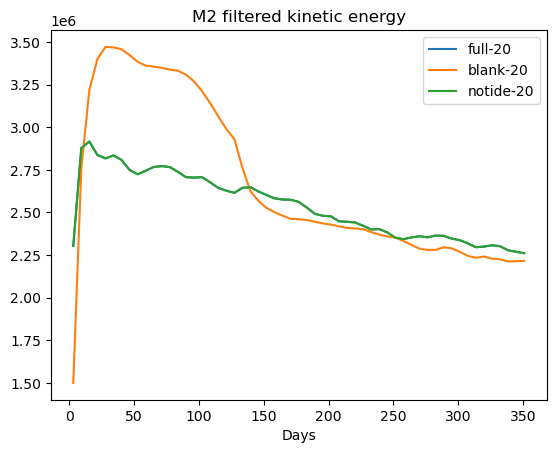

In [26]:
expts = ["full-20","full-40"]
expts = ["full-20","blank-20","notide-20"]


for i in expts:
    u = xr.open_mfdataset(
        f"/g/data/nm03/ab8992/postprocessed/{i}/UU/topdown/*.nc",decode_times = False,parallel=True
    ).UU
    v = xr.open_mfdataset(
        f"/g/data/nm03/ab8992/postprocessed/{i}/VV/topdown/*.nc",decode_times = False,parallel=True
    ).VV

    ke = 0.5*(u + v).integrate("yb").integrate("xb")

    ke = ke.assign_coords({"time":ke.time/24})
    ke.plot(label = i)

plt.title("M2 filtered kinetic energy")
plt.xlabel("Days")
plt.legend()



In [18]:
u

<xarray.DataArray (variable: 1, time: 57, yb: 101, xb: 376)>
dask.array<stack, shape=(1, 57, 101, 376), dtype=float64, chunksize=(1, 1, 101, 376), chunktype=numpy.ndarray>
Coordinates:
  * xb        (xb) float64 -0.0 4.0 8.0 12.0 ... 1.492e+03 1.496e+03 1.5e+03
  * yb        (yb) float64 -200.0 -196.0 -192.0 -188.0 ... 192.0 196.0 200.0
  * time      (time) float64 75.0 224.0 373.0 ... 8.121e+03 8.27e+03 8.419e+03
  * variable  (variable) object 'UU'